Three observations:
1) Capomulin adn Ramicane had the lowest overall tumor volumes out of the top 4 performing drugs. 
2) Overall, the positive regression line and correlation coefficient of 0.84 shows that the heavier the mouse, the larger its tumor volume will be
3) Capomulin was able to almost halve the tumor volume in mice over a 45 second period

In [2]:
# Dependencies and Setup

import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files

mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df =  pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.

unique_id = merged_df["Mouse ID"].nunique()
print(unique_id)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_df = merged_df[merged_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_unique = clean_df["Mouse ID"].nunique()
print(clean_unique)

248


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_volume = clean_df.groupby("Drug Regimen", observed = True)["Tumor Volume (mm3)"].mean()
median_volume = clean_df.groupby("Drug Regimen", observed = True)['Tumor Volume (mm3)'].median()
variance_volume = clean_df.groupby("Drug Regimen", observed = True)['Tumor Volume (mm3)'].var()
stdev_volume = np.sqrt(variance_volume)
sem_volume = clean_df.groupby("Drug Regimen", observed = True)['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary = pd.DataFrame({
    "Mean Tumor Volume": mean_volume,
    "Median Tumor Volume": median_volume,
    "Tumor Volume Variance": variance_volume,
    "Tumor Volume Std Dev.": stdev_volume,
    "Tumor Volume Std. Err.": sem_volume
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

drug_regimen = clean_df.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


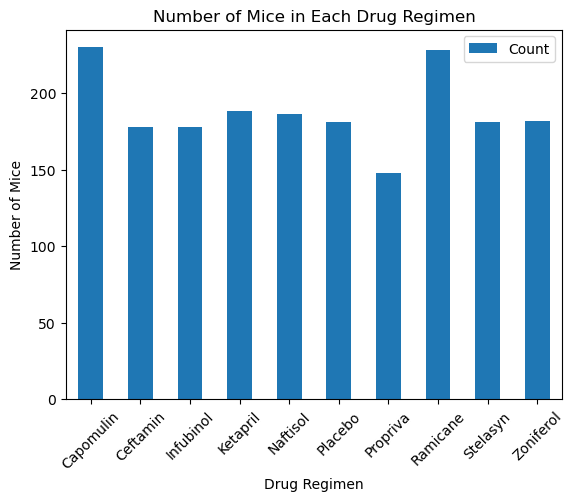

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_y_values = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
bar_x_values = bar_y_values.index

drug_regimen_count_df = pd.DataFrame({'Drug Regimen': bar_x_values, 'Count':bar_y_values})
ax = drug_regimen_count_df.plot.bar(x='Drug Regimen', y='Count', rot=45)

plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

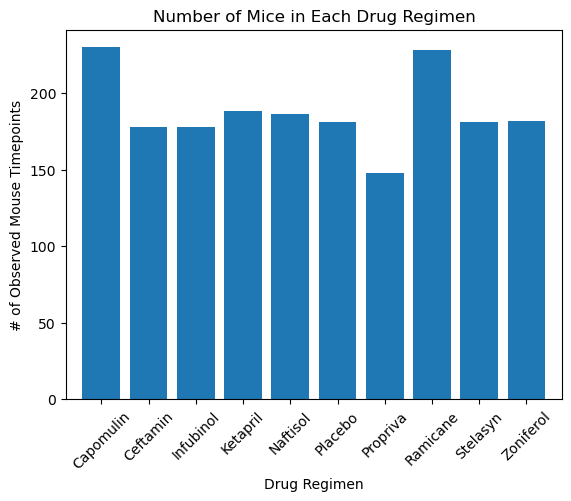

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(bar_x_values))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_x_values, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.bar(bar_x_values, bar_y_values)

plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

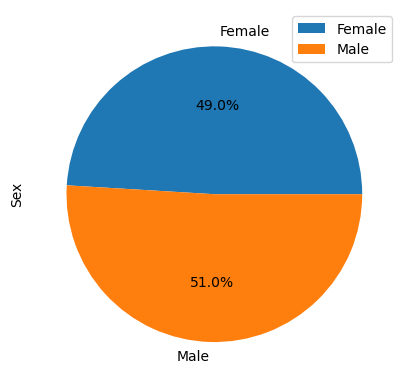

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_df.groupby(['Sex']).count().plot(kind='pie', y="Mouse ID", autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

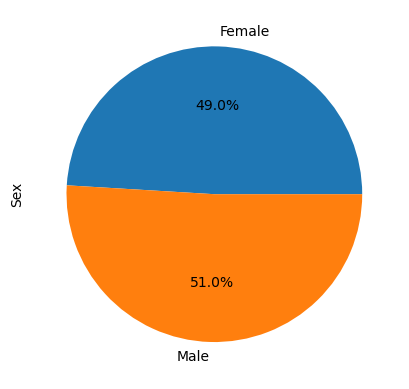

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Female", "Male"]
females = clean_df[clean_df["Sex"] == "Female"]["Mouse ID"].count()
males = clean_df[clean_df["Sex"] == "Male"]["Mouse ID"].count()
sex_count = [females, males]


plt.pie(sex_count, labels=sex, autopct='%1.1f%%', )
plt.ylabel("Sex")
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_point = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max_time_df = pd.merge(clean_df, last_time_point, on=["Mouse ID", "Timepoint"])
merge_max_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
max_timepoint_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

merged_data = pd.merge(clean_df, max_timepoint_df, on=['Mouse ID', 'Timepoint'])

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
outliers = []

for drug in treatment_list:
    final_tumor_volume = merged_data[merged_data["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)


for i, drug in enumerate(treatment_list):
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    
    lower_outlier = q1 - (1.5*iqr)
    upper_outlier = q3 + (1.5*iqr)
    
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_outlier) | (tumor_volume_data[i] > upper_outlier)]
    
    print(str(drug) + " Potential Outliers: " + str(outliers))

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


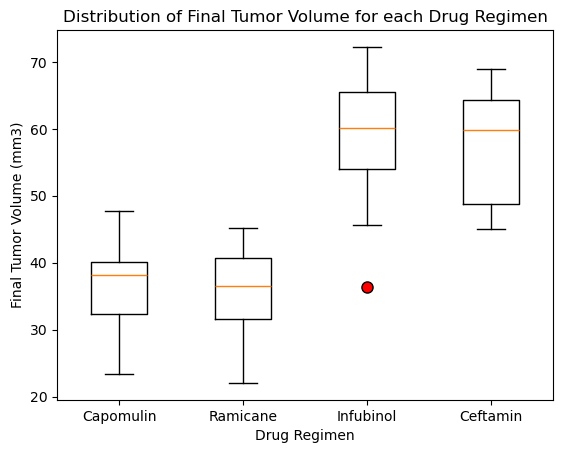

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=treatment_list, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume for each Drug Regimen')
plt.show()

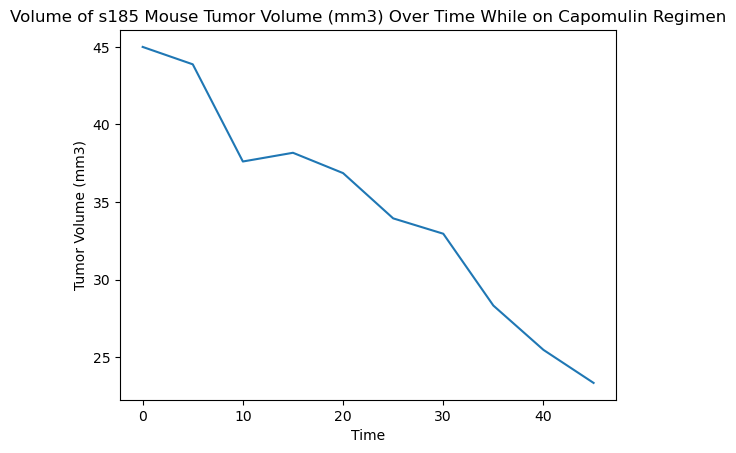

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_total = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_total
capomulin_mouse = capomulin_total[capomulin_total["Mouse ID"] == "s185"]
capomulin_mouse

capomulin_time = capomulin_mouse["Timepoint"]
capomulin_tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(capomulin_time, capomulin_tumor_volume)

plt.title("Volume of s185 Mouse Tumor Volume (mm3) Over Time While on Capomulin Regimen")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

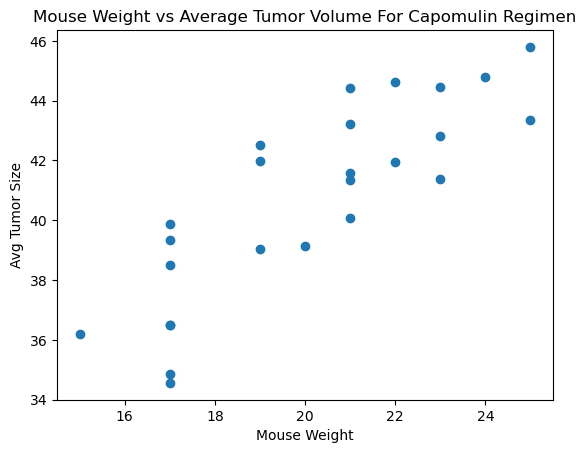

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_total.groupby(["Mouse ID"])["Weight (g)"].mean()
avg_tumor_size = capomulin_total.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, avg_tumor_size)

plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title("Mouse Weight vs Average Tumor Volume For Capomulin Regimen")
plt.show()

The Correlation Coefficient Is: 0.841936342469472


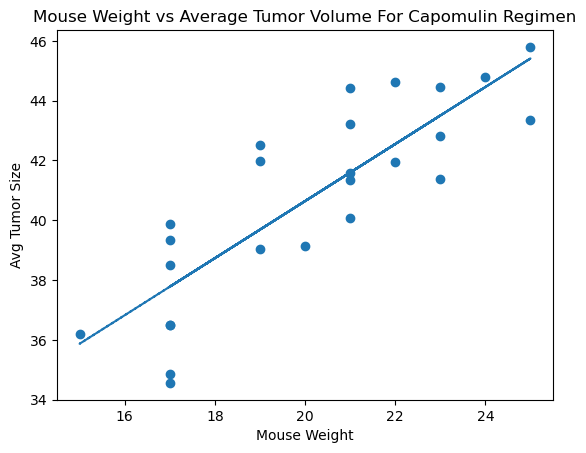

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

reg_slope, reg_int, reg_r, reg_p, reg_std_err = st.linregress(mouse_weight, avg_tumor_size)

print("The Correlation Coefficient Is: " + str(reg_r))

reg_fit = reg_slope * mouse_weight + reg_int

plt.scatter(mouse_weight, avg_tumor_size)
plt.plot(mouse_weight,reg_fit,"--")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title("Mouse Weight vs Average Tumor Volume For Capomulin Regimen")
plt.show()